In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [5]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [18]:
youtube_video = "https://www.youtube.com/watch?v=KsTs7-Q8hJM"

In [19]:
video_id = youtube_video.split("=")[1]

In [20]:
video_id

'KsTs7-Q8hJM'

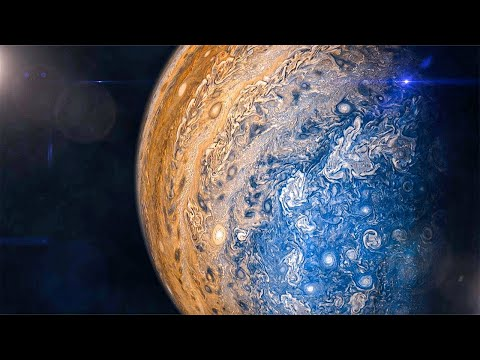

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [22]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['en-GB'])

In [23]:
transcript[0:5]

[{'text': 'The northern lights on Jupiter are the most',
  'start': 2.25,
  'duration': 1.68},
 {'text': 'spectacular in our solar system.', 'start': 3.93, 'duration': 2.19},
 {'text': "They're stunning.", 'start': 7.7, 'duration': 1.4},
 {'text': "And they're bigger than our entire planet.",
  'start': 9.1,
  'duration': 5.04},
 {'text': 'They produce incredibly powerful flares',
  'start': 14.14,
  'duration': 3.12}]

In [24]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

5922


In [25]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [26]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 The northern lights on Jupiter are the most spectacular in our solar system. They're stunning. And they're bigger than our entire planet. They produce incredibly powerful flares that reach terawatts of power. That's more energy than you'd need to briefly supply all of human civilisation. What causes them? Why do they seem to pulse like clockwork? To truly unlock Jupiter's mysteries we needed a way to get closer to it than ever before. Jupiter is the most extreme environment NASA's ever visited. To send a spacecraft there is a little bit insane. We had to build an armoured tank to go there. Juno arrived in Jupiter's orbit in 2016. As it got closer, the auroras on Jupiter became so dramatic and active that astronomers said it was like Jupiter was putting on a fireworks display for Juno's arrival. Which seems apt given the sheer scale of the spacecraft. Behind me is the Juno spacecraft. Basically life-size, it's an enormous spacecraft close to 70 feet in diameter as it spins 

In [27]:
len(str(summarized_text))

1887

In [28]:
str(summarized_text)

'[" The northern lights on Jupiter are the most spectacular in our solar system . They produce incredibly powerful flares that reach terawatts of power . Jupiter is the most extreme environment NASA\'s ever visited. To send a spacecraft there is a little bit insane. We had to build an armoured tank to go there .", " Juno showed us more than we\'d ever seen of Jupiter\'s auroras as they rippled over the planet\'s poles . Jupiter\'s magnetic field, also known as the magnetosphere, is 20 thousand times stronger than the one here on Earth . It\'s the biggest structure in the Solar System next to the Sun\'s magnetosphere .", " Scientists in California recreate Jupiter\'s core using lasers . They fired lasers at a tiny target which imitates the core of Jupiter . The lasers simulate the unfathomable pressures going on inside . They fill a little portion inside this cone with liquid hydrogen . About 20 millionth of a gram .", " The team observed this surreal change that takes place in the core